### 1. Work through the book – build your own K Means cluster function and carry out the modelling done in the book.

### Scratch functions

In [1]:
from typing import List
Vector = List[float]

def scalar_multiply(c, v):
 """c is a number, v is a vector"""
 return [c * v_i for v_i in v]
def vector_mean(vectors):
 """compute the vector whose ith element is the mean of the
 ith elements of the input vectors"""
 n = len(vectors)
 return scalar_multiply(1/n, vector_sum(vectors))
def vector_subtract(v, w):
 """subtracts corresponding elements"""
 return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v:Vector, w:Vector) -> float:
    assert len(v) == len(w), "Vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
    return dot(v,v)

def squared_distance(v, w):
 """(v_1 - w_1)  2 + ... + (v_n - w_n)  2"""
 return sum_of_squares(vector_subtract(v, w))

def vector_sum(vectors: List[Vector]) -> Vector:
    assert vectors, "no vectors provided!"
    
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    
    return [sum(vector[i] for vector in vectors)
           for i in range(num_elements)]

#### The Model

In [2]:
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

In [3]:
assert num_differences([1,2,3], [2,1,3]) == 2
assert num_differences([1,2], [1,2]) == 0

##### Means of Clusters

In [4]:
def cluster_means(k: int, 
                 inputs: List[Vector],
                 assignments: List[int]) -> List[Vector]:
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)
    return [vector_mean(cluster) if cluster else random.choice(inputs)
           for cluster in clusters]

In [5]:
import tqdm
import random
import itertools

In [6]:
class KMeans:
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
        
    def classify(self, input):
        return min(range(self.k),
        key=lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs: List[Vector]) -> None:
        assignments = [random.randrange(self.k) for _ in inputs]
        
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")
#     # choose k random points as the initial means
#         self.means = random.sample(inputs, self.k)
#         assignments = None
#         while True:
#         # Find new assignments
#             new_assignments = map(self.classify, inputs)
#             # If no assignments have changed, we're done.
#             if assignments == new_assignments:
#                 return
#             # Otherwise keep the new assignments,
#             assignments = new_assignments
#             # And compute new means based on the new assignments
#             for i in range(self.k):
#             # find all the points assigned to cluster i
#                 i_points = [p for p, a in zip(inputs, assignments) if a == i]
#             # make sure i_points is not empty so don't divide by 0
#             if i_points:
#                 self.means[i] = vector_mean(i_points)

#### Using the class

In [7]:
import random

In [8]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [9]:
clusterer = KMeans(3)

In [10]:
clusterer.train(inputs)

changed: 1 / 20: : 2it [00:00, 789.37it/s]


In [11]:
print(clusterer.means)

[[-15.888888888888888, -10.333333333333332], [-43.800000000000004, 5.4], [18.333333333333332, 19.833333333333332]]


In [12]:
means = sorted(clusterer.means)

In [13]:
assert len(means) == 3

In [14]:
assert squared_distance(means[0], [-44, 5]) < 1

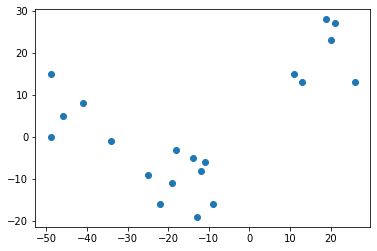

In [15]:
import numpy as np
import matplotlib.pyplot as plt

inputs_np = np.array(inputs)
plt.scatter(inputs_np[:,0], inputs_np[:,1])

#### Choosing k

0it [00:00, ?it/s]
changed: 3 / 20: : 6it [00:00, 680.18it/s]
changed: 1 / 20: : 2it [00:00, 707.48it/s]
changed: 1 / 20: : 3it [00:00, 450.98it/s]
changed: 1 / 20: : 3it [00:00, 641.82it/s]
changed: 1 / 20: : 3it [00:00, 486.07it/s]
changed: 1 / 20: : 3it [00:00, 475.37it/s]
changed: 2 / 20: : 3it [00:00, 417.48it/s]
changed: 2 / 20: : 2it [00:00, 343.44it/s]
changed: 1 / 20: : 3it [00:00, 327.19it/s]
changed: 1 / 20: : 3it [00:00, 401.28it/s]
changed: 1 / 20: : 4it [00:00, 337.03it/s]
changed: 1 / 20: : 4it [00:00, 393.71it/s]
changed: 2 / 20: : 3it [00:00, 242.03it/s]
changed: 4 / 20: : 2it [00:00, 260.41it/s]
changed: 2 / 20: : 4it [00:00, 192.80it/s]
changed: 1 / 20: : 4it [00:00, 214.38it/s]
changed: 1 / 20: : 5it [00:00, 329.91it/s]
changed: 1 / 20: : 5it [00:00, 289.07it/s]
changed: 5 / 20: : 2it [00:00, 185.25it/s]


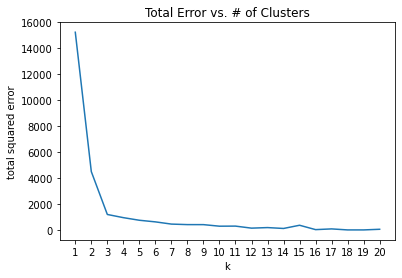

In [16]:
def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = map(clusterer.classify, inputs)
    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

# now plot from 1 up to len(inputs) clusters
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

##### Den bedste k er 3

#### Image and colors

In [18]:
path_to_png_file = r"cat.jpg" # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(path_to_png_file)

In [19]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [20]:
pixels = [pixel for row in img for pixel in row]

In [ ]:
clusterer = KMeans(5)
clusterer.train(pixels) # this might take a while

changed: 318 / 667000: : 23it [26:24, 69.46s/it]  

In [ ]:
def recolor(pixel):
    cluster = clusterer.classify(pixel) # index of the closest cluster
    return clusterer.means[cluster] # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row] # recolor this row of pixels
           for row in img]

In [ ]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

### 2. Write a brief description of the use cases for K Means and DBSCAN algorithms. Hints on good use cases are in the notes – do further research as needed (e.g on DBSCAN used in recommendation engines

### 3. Thinking about these two algorithms provide a formal definition of clustering

### 4. Describe with examples of plotting two ways of selecting the value of K for K-means clustering

### 5. Which algorithm is good for large datasets and which one is good for regions of high density

### 6. What does ‘high density mean’ in DBSCAN

### 7. Describe with an example how the initialisation of K Means can affect the inertia value and the quality of the model. 

### 8. Prepare a model using K Means for the Olivetti data set from scikit learn – this exercise comes from Gueron p275